In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
ds = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print(ds.shape)
#ds.head()


(146660, 19)


In [3]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
print(ds.isnull().sum())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Departamento'),
  Text(1, 0, 'PH'),
  Text(2, 0, 'Casa'),
  Text(3, 0, 'Lote'),
  Text(4, 0, 'Casa de campo'),
  Text(5, 0, 'Oficina'),
  Text(6, 0, 'Otro'),
  Text(7, 0, 'Local comercial'),
  Text(8, 0, 'Cochera'),
  Text(9, 0, 'Depósito')])

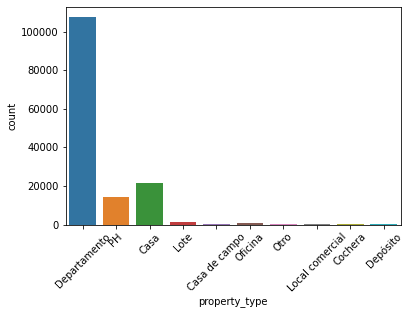

In [4]:
sns.countplot(data = ds, x = 'property_type') #, hue = 'property_type')
plt.xticks(rotation=45)

En este primer analisis exploratorio de datos sobre la variable 'property_type' , encontramos que de sus 10 variables, "Departamento", "Casa" y "PH" son los que mas registros tienen, siguendo el respectivo orden.

In [5]:
ds.head()


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


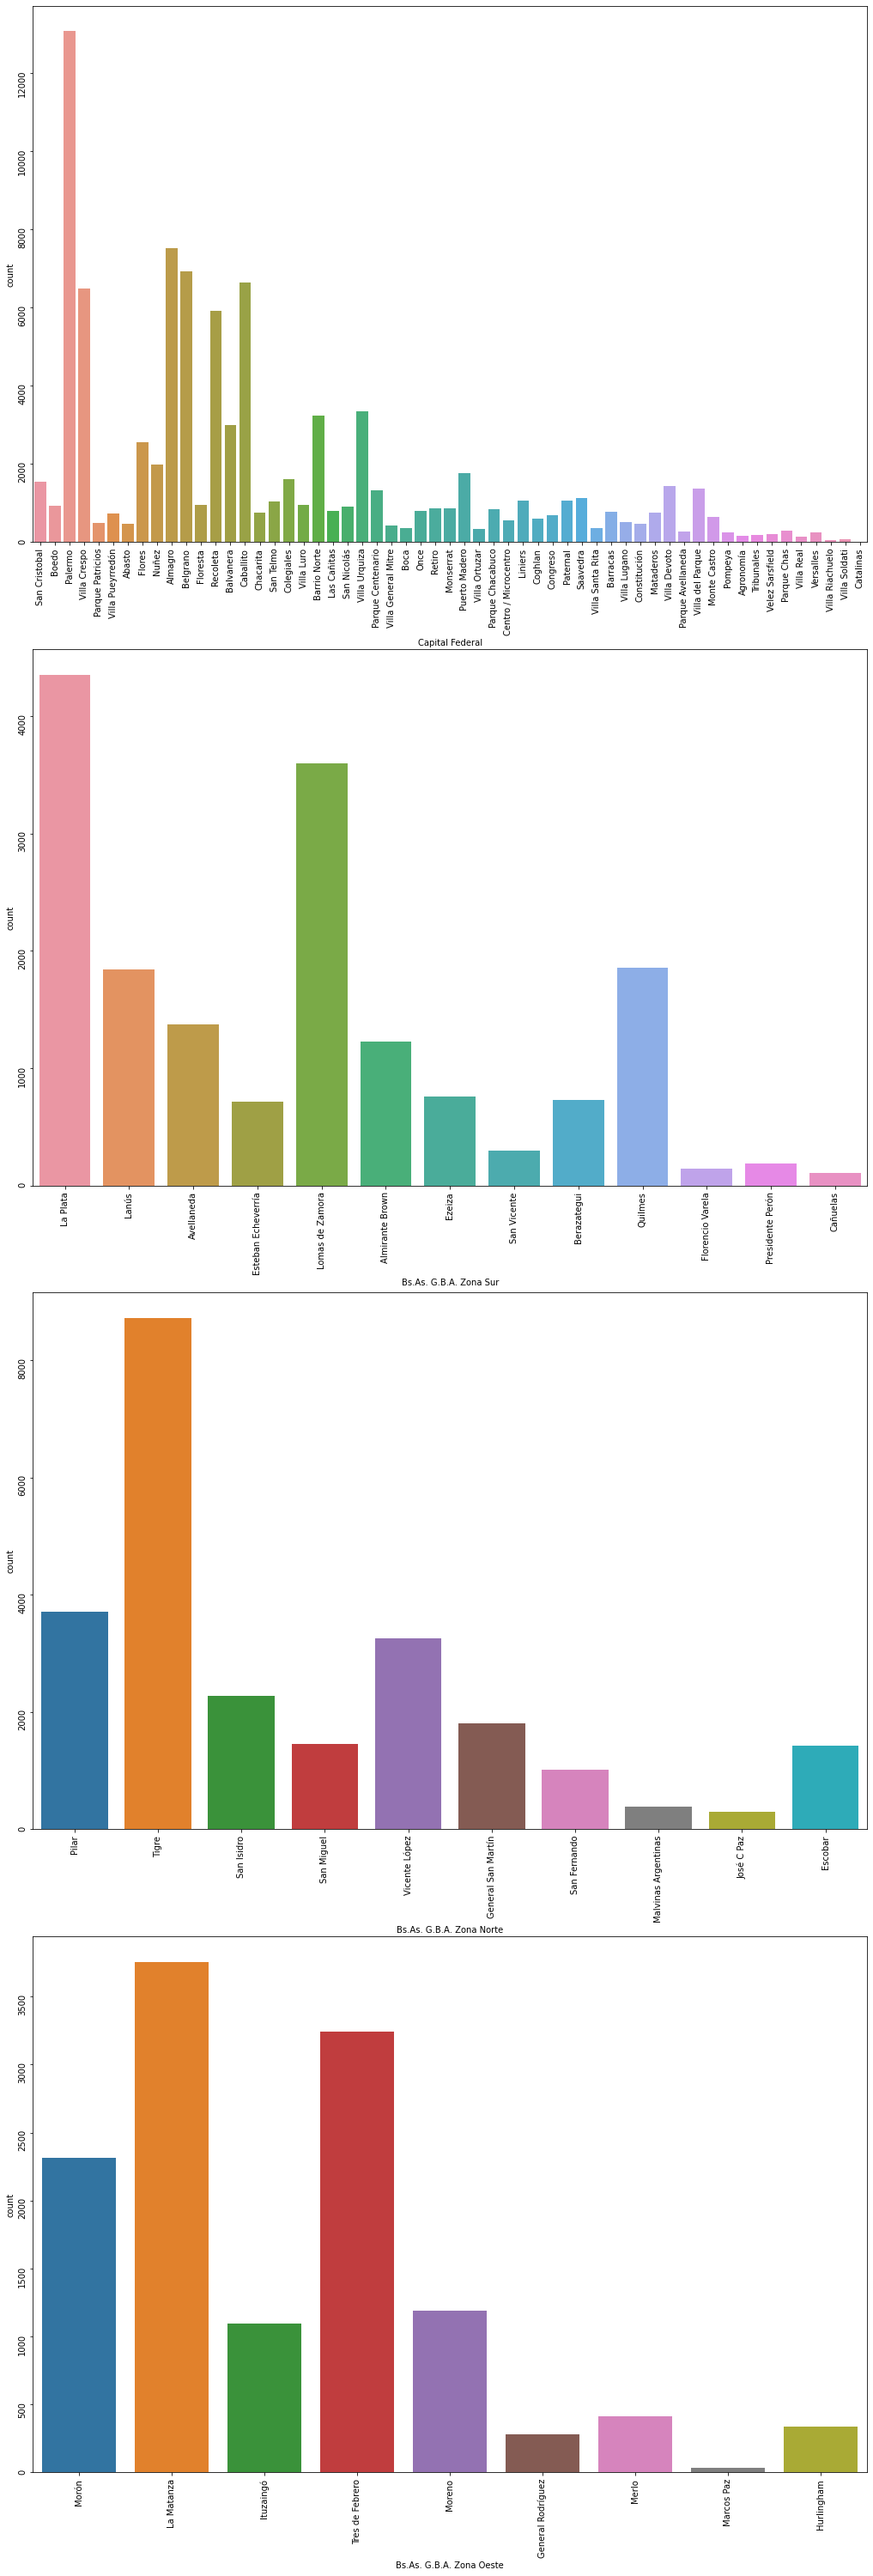

In [6]:
fig, axes = plt.subplots(4, 1,figsize=(20, 10))
plt.subplots_adjust(bottom=0.01, right=0.8, top=4.0)



capital= ds["l2"].isin(['Capital Federal'])
gba_zs = ds["l2"].isin(['Bs.As. G.B.A. Zona Sur'])
gba_zn = ds["l2"].isin(['Bs.As. G.B.A. Zona Norte'])
gba_zo = ds["l2"].isin(['Bs.As. G.B.A. Zona Oeste'])

ax = sns.countplot(data = ds, x = ds[ capital ]["l3"],ax=axes[0])
ax.set(xlabel='Capital Federal')
ax.tick_params(labelrotation=90)

ax1 = sns.countplot(data = ds, x = ds[ gba_zs ]["l3"],ax=axes[1])
ax1.set(xlabel='Bs.As. G.B.A. Zona Sur')
ax1.tick_params(labelrotation=90)

ax2 = sns.countplot(data = ds, x = ds[ gba_zn ]["l3"],ax=axes[2])
ax2.set(xlabel='Bs.As. G.B.A. Zona Norte')
ax2.tick_params(labelrotation=90)

ax3 = sns.countplot(data = ds, x = ds[ gba_zo ]["l3"],ax=axes[3])
ax3.set(xlabel='Bs.As. G.B.A. Zona Oeste')
ax3.tick_params(labelrotation=90)

Continuando con el analisis, podemos observar que Capital Federal presenta mayor cantidad de propiedades que el resto de las zonas y, dentro de la misma, se destaca Palermo por el mismo motivo

In [7]:
departamento = ds["property_type"].isin(['Departamento'])
ph = ds["property_type"].isin(['PH'])
casa = ds["property_type"].isin(['Casa'])

muestra1 = ds[departamento][capital]
muestra2 = ds[ph][capital]
muestra3 = ds[casa][capital]
muestra = pd.concat([muestra1,muestra2,muestra3])

muestra.head()



,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
11,2019-10-17,2019-10-26,2019-10-17,-34.603683,-58.381557,Argentina,Capital Federal,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,USD,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",Departamento,Venta
12,2019-10-17,2019-12-19,2019-10-17,-34.630349,-58.417223,Argentina,Capital Federal,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,USD,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento,Venta
20,2019-10-17,2019-10-24,2019-10-17,-34.608246,-58.444262,Argentina,Capital Federal,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,USD,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento,Venta
21,2019-10-17,2019-10-28,2019-10-17,-34.603890,-58.410998,Argentina,Capital Federal,Abasto,1.0,1.0,1.0,22.0,22.0,48000.0,USD,Monoambiente Vista Abierta,Excelente Inversion o 1era vivienda en renovad...,Departamento,Venta


Vamos a proceder a filtrar aun mas nuestra muestra:
- Selecccionamos aquellas propiedades con superficie total sea menor a 1000 m2 y mayor a 15 m2.
- Filtramos aquellas propiedades cuyo precio es menor 4000000 dólares.

In [8]:
muestra = muestra[(muestra['surface_total'] <= 1000) & (muestra["surface_total"] >= 15)]

muestra = muestra[(muestra['price'] <= 4000000)]

print(muestra.shape)

(82373, 19)


Analizamos cuales son los barrios mas caros de Buenos Aires:

<AxesSubplot:title={'center':'Barrios Más Caros'}, xlabel='l3', ylabel='Precio'>

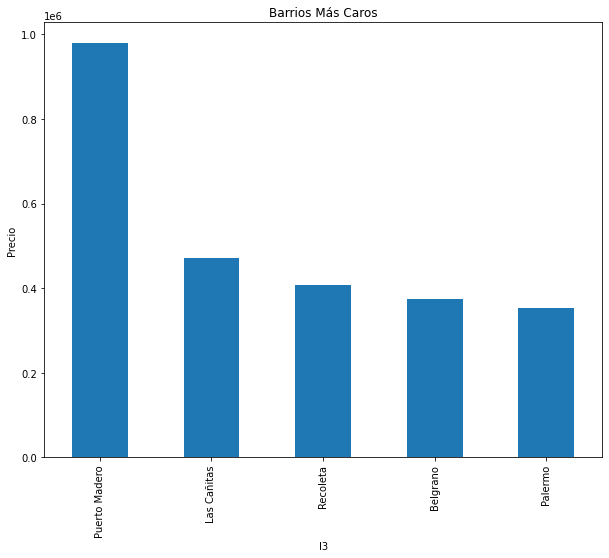

In [9]:
table = pd.pivot_table(muestra, values='price', index=['l3'], aggfunc=np.mean)
barrios_caros = table.sort_values('price', ascending=False).iloc[:5]
barrios_caros

# Gráfica de los Barrios más caros
plt.title('Barrios Más Caros')
plt.xlabel('Barrios')
plt.ylabel('Precio')
barrios_caros.price.nlargest(10).plot(kind='bar', figsize=(10,8))

En el boxplot de estas 6 variables se puede observar que todas tienen valores outliers, lo cual distorciona la comprension de sus distribuciones


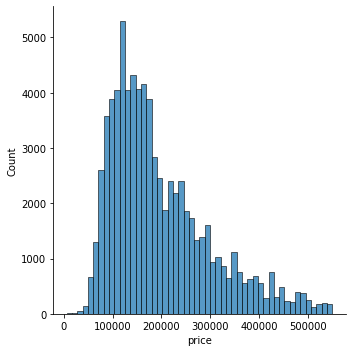

In [10]:
sns.displot(muestra.price[muestra["price"] < 550000], bins = 50)

En el grafico de distribucion de la variable "Precio" se puede observar que se asemeja a una distribucion normal con asimetría hacia la derecha

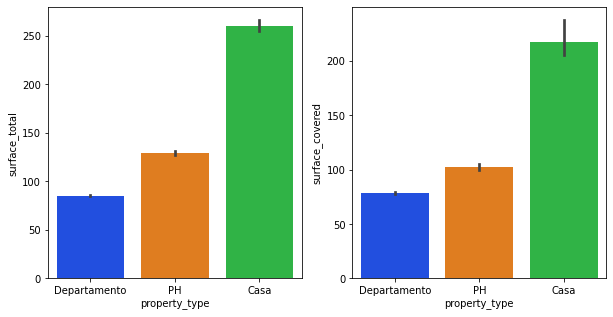

In [11]:
f, axes = plt.subplots(1, 2, figsize=(10, 5))

ax= sns.barplot(x = "property_type", y = 'surface_total', data = muestra, palette='bright' , ax=axes[0])
ax1= sns.barplot(x = "property_type", y = 'surface_covered', data = muestra, palette='bright', ax=axes[1] )

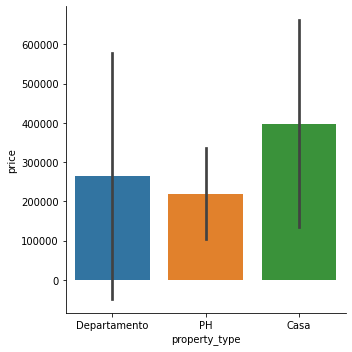

In [12]:
sns.catplot(data=muestra, x="property_type",y='price', kind= "bar", ci="sd")

El catplot demuestra que entre los registros de 'Departamento' existe un valor precio negativo.

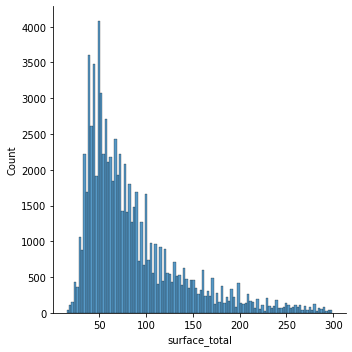

In [13]:
sns.displot(muestra.surface_total[muestra["surface_total"] < 300])

Vamos a hacer una consulta para saber cuales son los valores de las columnas que tienen un único valor:

In [14]:
print(muestra.apply(lambda col: col.unique()))

start_date         [2019-10-17, 2019-03-04, 2019-07-09, 2019-08-1...
end_date           [2019-12-23, 2019-10-26, 2019-12-19, 2019-10-2...
created_on         [2019-10-17, 2019-03-04, 2019-07-09, 2019-08-1...
lat                [-34.6058798, -34.603683000000004, -34.6303489...
lon                [-58.38494910000001, -58.381557, -58.417222700...
l1                                                       [Argentina]
l2                                                 [Capital Federal]
l3                 [San Cristobal, Boedo, Abasto, Flores, Nuñez, ...
rooms              [7.0, 2.0, 1.0, 3.0, 4.0, 5.0, 6.0, 10.0, 8.0,...
bedrooms           [7.0, 1.0, 2.0, 3.0, 4.0, 5.0, 0.0, 6.0, 8.0, ...
bathrooms          [2.0, 1.0, 3.0, 4.0, 5.0, nan, 6.0, 10.0, 7.0,...
surface_total      [140.0, 68.0, 50.0, 31.0, 22.0, 45.0, 58.0, 41...
surface_covered    [140.0, 59.0, 44.0, 31.0, 22.0, 45.0, 48.0, 41...
price              [153000.0, 149000.0, 115000.0, 75000.0, 48000....
currency                          

Podemos observar que las columnas 'Currency', 'l1', 'l2' y 'operation_type' son columnas de valores unicos. Estas pueden generar errores en los modelos de predicción ya que son predictores sin varianza, es por eso que vamos a proceder a eliminarlas.

Además, las columnas "start_date", "end_date", "created_on", "description" y "title" van a ser removidas ya que son columnas más bien informativas y no aportan a la predicción del precio de las propiedades.

In [15]:
muestra = muestra.drop(["start_date","end_date","currency","operation_type", "created_on","title","description","l1",'l2'],axis=1)

In [16]:
muestra.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
11,-34.603683,-58.381557,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento
12,-34.630349,-58.417223,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento
20,-34.608246,-58.444262,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento
21,-34.603890,-58.410998,Abasto,1.0,1.0,1.0,22.0,22.0,48000.0,Departamento


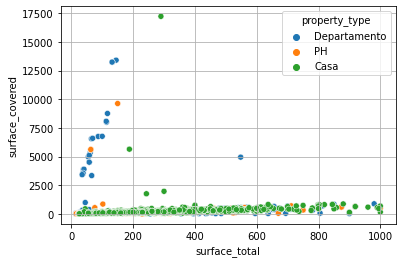

In [17]:
sns.scatterplot(data=muestra, x='surface_total', y='surface_covered', hue="property_type")
plt.grid()
plt.show()

En el grafico anterior podemos observar que hay varios casos de propiedades en los que los valores de superficie cubierta son superiores a los de la superficie total, lo cual significa que hubo un error en el proceso de imputacion de los valores.

Cuando surface_covered > surface_total , hay 2 posibles decisiones:

Asignarle a superficie cubierta el valor de la superficie total cuando se cumpla dicha condición o eliminar aquellos registros donde la superficie cubierta sea mayor a la total
 
En este caso voy a eliminar aquellos registros que cumplan la condición.

In [18]:
# Dropeo del dataset aquellas propiedades donde la superficie cubierta sea mayor a la total.
muestra.drop(muestra.loc[muestra['surface_covered'] >muestra['surface_total']].index,inplace=True ,axis=0)

In [19]:
muestra.shape

(81622, 10)

Volvemos a plottear el grafico anterior y observamos que no hay valores de superficie cubierta que sean mayores a los de superficie total:

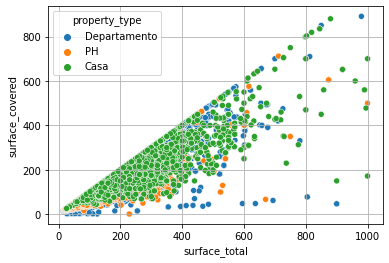

In [20]:
sns.scatterplot(data=muestra, x='surface_total', y='surface_covered', hue="property_type")
plt.grid()
plt.show()

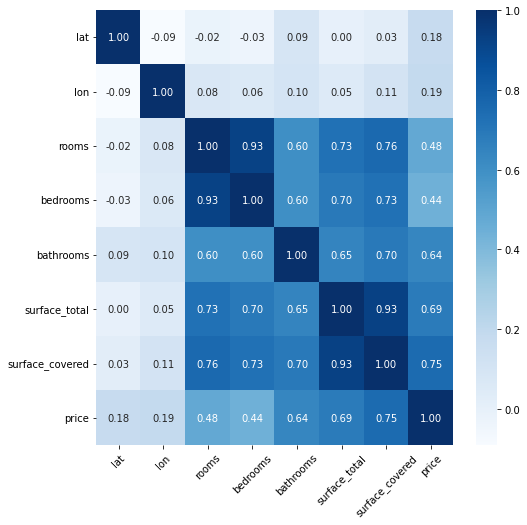

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(muestra.corr(), fmt= '.2f', annot= True, ax=ax,cmap='Blues')
plt.xticks(rotation = 45)
plt.show()

En el heatmap anterior podemos tomar la decision de remover alguna de aquellas variables que tengan correlacion muy alta (sea mayor a 90%) para evitar problemas de multicolinealidad a la hora de trabajar con las regresiones y los distintos modelos predictivos.

Podemos observar que la correlacion entre bedrooms y rooms es de un 93% , al igual que la correlacion entre surface_covered y surface_total.

Vamos a dejar Rooms afuera, ya que Rooms tiene una correlacion con price un poquito mayor que bedrooms. Tambien vamos a eliminar la variable surface_total, ya que surface_covered tiene una correlacion con price un poco mayor.

Procedemos a hacer el drop de estas variables:

In [22]:
muestra = muestra.drop(['bedrooms'],axis=1)

In [23]:
muestra = muestra.drop(['surface_total'],axis=1)

In [24]:
muestra.columns

Index(['lat', 'lon', 'l3', 'rooms', 'bathrooms', 'surface_covered', 'price',
       'property_type'],
      dtype='object')

Vamos a consultar por las estadisticas descriptivas de nuestras features:

In [25]:
muestra.describe()

,lat,lon,rooms,bathrooms,surface_covered,price
count,77364.000000,77364.000000,81622.000000,80750.000000,81105.000000,8.162200e+04
mean,-34.598397,-58.434886,3.003418,1.553313,81.992257,2.631458e+05
std,0.023478,0.035799,1.296908,0.850428,61.487416,2.982065e+05
min,-34.696419,-58.530468,1.000000,1.000000,1.000000,6.000000e+03
25%,-34.612216,-58.457421,2.000000,1.000000,44.000000,1.250000e+05
50%,-34.598726,-58.432771,3.000000,1.000000,63.000000,1.800000e+05
75%,-34.584180,-58.409599,4.000000,2.000000,95.000000,2.800000e+05
max,-34.535909,-58.353930,26.000000,14.000000,891.000000,4.000000e+06


Se puede observar que la variable surface_covered es nuestra feature con mayor desvio estandard en su distribucion, asi que vamos a proceder a analizar su distribucion para encontrar outliers en esta variable primero:

In [26]:
#Realizo una copia del dataset que vengo trabajando
muestra_1 = muestra.copy()
muestra_1.shape

(81622, 8)

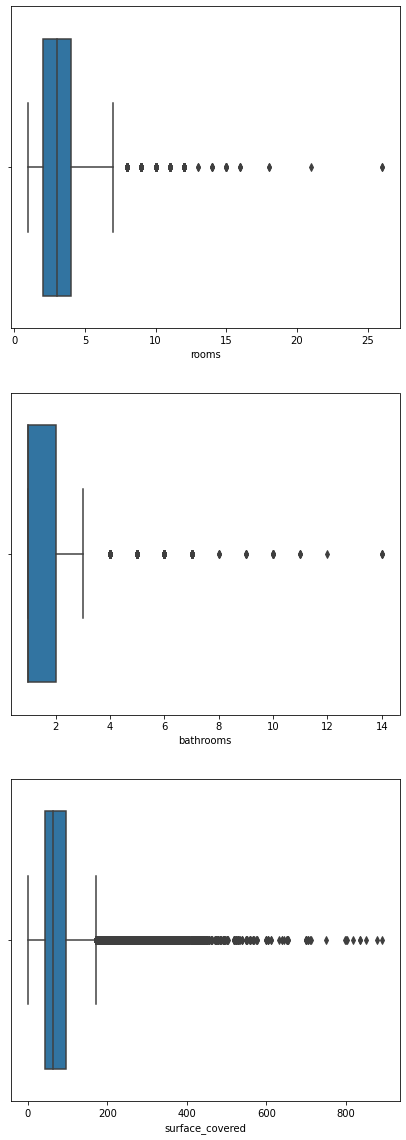

In [27]:
#rooms, bedrooms, bathrooms, surface_total, surface_covered, price antes de sacar los outliers
f, axes = plt.subplots(3, 1, figsize=(8, 8))
plt.subplots_adjust(bottom=0.1, right=0.8, top=2.0)

sns.boxplot(muestra["rooms"] , ax=axes[0])
sns.boxplot(muestra["bathrooms"] ,  ax=axes[1])
sns.boxplot(muestra["surface_covered"] , ax=axes[2])

plt.show()

In [28]:
propiedades = muestra.property_type.unique()

propiedades

array(['Departamento', 'PH', 'Casa'], dtype=object)

In [29]:
muestra["surface_covered"].value_counts().sort_index()

1.0      3
2.0      4
3.0      8
4.0      4
5.0      2
        ..
819.0    1
835.0    2
850.0    1
880.0    1
891.0    1
Name: surface_covered, Length: 489, dtype: int64

<AxesSubplot:xlabel='surface_covered', ylabel='Density'>

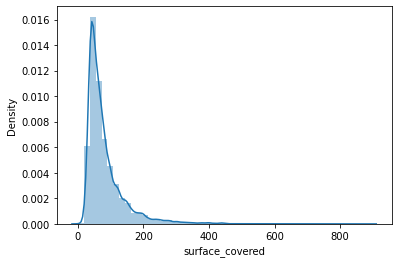

In [30]:
sns.distplot(muestra['surface_covered'])

## Outliers

In [31]:
# Cuantil 25 de Superficie total
Q1 = muestra["surface_covered"].quantile(0.25)
print('El primer cuantil es:', Q1)
# Cuantil 75 de Superficie total
Q3 = muestra["surface_covered"].quantile(0.75)
print('El Tercer Cuartil es:', Q3)
# Cálculo del IQR
IQR = Q3 - Q1
# Mínimo valor de cantidad para el campo Dormitorios - se itera por cada tipo de propiedad
superifice_Cubierta_minima = Q1 - (IQR*1.5)
# Máximo valor de cantidad para el campo Dormitorios - se itera por cada tipo de propiedad
superifice_Cubierta_maxima = Q3 + (IQR*1.5)

print("La Superficie cubierta maxima en es {}, y la superficie cubierta minima  es {} y el IQR {}" .format(superifice_Cubierta_maxima,superifice_Cubierta_minima,IQR))


El primer cuantil es: 44.0
El Tercer Cuartil es: 95.0
La Superficie cubierta maxima en es 171.5, y la superficie cubierta minima  es -32.5 y el IQR 51.0


In [32]:
#Detecto los outliers de surface_covered

outliers_surface_covered = muestra[(muestra['surface_covered'] < superifice_Cubierta_minima)| (muestra['surface_covered'] > superifice_Cubierta_maxima)]
outliers_surface_covered

,lat,lon,l3,rooms,bathrooms,surface_covered,price,property_type
202,-34.613087,-58.381360,Monserrat,3.0,2.0,197.0,600000.0,Departamento
274,-34.572445,-58.420624,Palermo,6.0,2.0,304.0,1480000.0,Departamento
280,-34.576297,-58.419997,Palermo,6.0,3.0,276.0,1680000.0,Departamento
282,-34.575574,-58.407113,Palermo,7.0,3.0,224.0,1000000.0,Departamento
286,-34.582185,-58.401540,Palermo,6.0,3.0,193.0,810000.0,Departamento
...,...,...,...,...,...,...,...,...
135139,-34.637797,-58.420875,Boedo,6.0,3.0,240.0,347000.0,Casa
135251,-34.658084,-58.433922,Pompeya,4.0,3.0,279.0,260000.0,Casa
135255,-34.658081,-58.433857,Villa Soldati,4.0,3.0,279.0,260000.0,Casa
141702,-34.635162,-58.476276,Floresta,6.0,3.0,421.0,374000.0,Casa


In [33]:
#eliminamos los outliers que estan fuera ambos bigotes (superior e inferior)

muestra = muestra[(muestra['surface_covered'] >= superifice_Cubierta_minima)]
muestra = muestra[(muestra['surface_covered'] <= superifice_Cubierta_maxima)]


In [34]:
muestra.shape

(75208, 8)

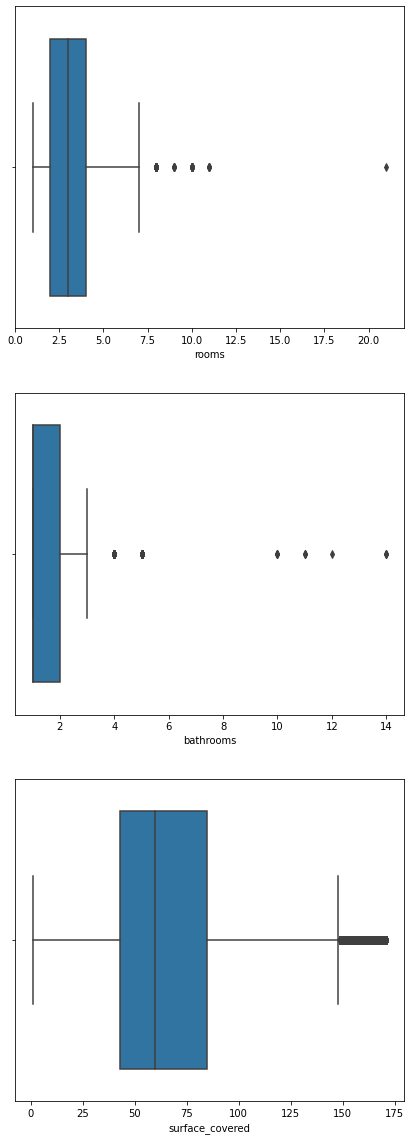

In [35]:
#rooms,bathrooms, surface_covered, antes de sacar los outliers
f, axes = plt.subplots(3, 1, figsize=(8, 8))
plt.subplots_adjust(bottom=0.1, right=0.8, top=2.0)

sns.boxplot(muestra["rooms"] , ax=axes[0])
sns.boxplot(muestra["bathrooms"] ,  ax=axes[1])
sns.boxplot(muestra["surface_covered"] , ax=axes[2])

plt.show()

In [36]:
muestra.shape

(75208, 8)

In [37]:
muestra.describe()

,lat,lon,rooms,bathrooms,surface_covered,price
count,71485.000000,71485.000000,75208.000000,74439.000000,75208.000000,7.520800e+04
mean,-34.598502,-58.435742,2.817121,1.433227,68.662469,2.118263e+05
std,0.023261,0.035264,1.063194,0.690019,33.058022,1.474330e+05
min,-34.696419,-58.530468,1.000000,1.000000,1.000000,7.500000e+03
25%,-34.612188,-58.458128,2.000000,1.000000,43.000000,1.200000e+05
50%,-34.599003,-58.433517,3.000000,1.000000,60.000000,1.700000e+05
75%,-34.584795,-58.411723,4.000000,2.000000,85.000000,2.520000e+05
max,-34.535909,-58.353930,21.000000,14.000000,171.000000,3.249900e+06


Tuvo sentido eliminar los outliers anteriores ya que parecen ser valores muy elevados de superficie cubierta para la distribucion de los departamentos, casas y PH's de Buenos Aires.

Podemos observar que el desvio estandard de la varaible surface_covered disminuyo a la mitad pasando de 66 a 33. Al mismo tiempo, disminuyeron un poco los desvios de las demás variables (la unica que aumento un poco es la variable "bathrooms") aunque la variable objetivo incrementó su desvio el doble.

Vamos a continuar analizando las variables con más desvio estandard y ver si eliminamos más outliers:

Ahora vamos a analizar la variable "Rooms" :

In [38]:
# Cuantil 25 de Rooms
Q1 = muestra["rooms"].quantile(0.25)
print('El primer cuantil es:', Q1)
# Cuantil 75 de Superficie total
Q3 = muestra["rooms"].quantile(0.75)
print('El Tercer Cuartil es:', Q3)
# Cálculo del IQR
IQR = Q3 - Q1
# Mínimo valor de cantidad para Rooms
rooms_minimo = Q1 - (IQR*1.5)
# Máximo valor de cantidad para Rooms
rooms_maximo = Q3 + (IQR*1.5)

print("El valor de rooms maximo es {}, y el valor minimo es {} y el IQR {}" .format(rooms_maximo,rooms_minimo,IQR))


El primer cuantil es: 2.0
El Tercer Cuartil es: 4.0
El valor de rooms maximo es 7.0, y el valor minimo es -1.0 y el IQR 2.0


In [39]:
#Detecto los outliers de surface_covered

outliers_rooms = muestra[(muestra['rooms'] < rooms_minimo)| (muestra['rooms'] > rooms_maximo)]
outliers_rooms

,lat,lon,l3,rooms,bathrooms,surface_covered,price,property_type
3711,-34.595801,-58.394750,Recoleta,10.0,5.0,168.0,370000.0,Departamento
5148,-34.593220,-58.441855,Villa Crespo,8.0,1.0,140.0,180000.0,Departamento
10277,-34.593220,-58.441855,Villa Crespo,8.0,1.0,140.0,180000.0,Departamento
12222,-34.595282,-58.378013,Retiro,11.0,1.0,42.0,245000.0,Departamento
13445,-34.593220,-58.441855,Villa Crespo,8.0,1.0,140.0,180000.0,Departamento
...,...,...,...,...,...,...,...,...
83839,-34.609216,-58.403140,Balvanera,8.0,3.0,143.0,250000.0,Casa
85135,-34.652674,-58.419942,Pompeya,10.0,2.0,150.0,350000.0,Casa
88991,-34.571346,-58.447880,Belgrano,8.0,5.0,153.0,649000.0,Casa
118264,-34.628777,-58.494362,Velez Sarsfield,8.0,1.0,158.0,328000.0,Casa


In [40]:
#eliminamos los outliers que estan fuera ambos bigotes (superior e inferior)

muestra = muestra[(muestra['rooms'] >= rooms_minimo)]
muestra = muestra[(muestra['rooms'] <= rooms_maximo)]

In [41]:
muestra.shape

(75116, 8)

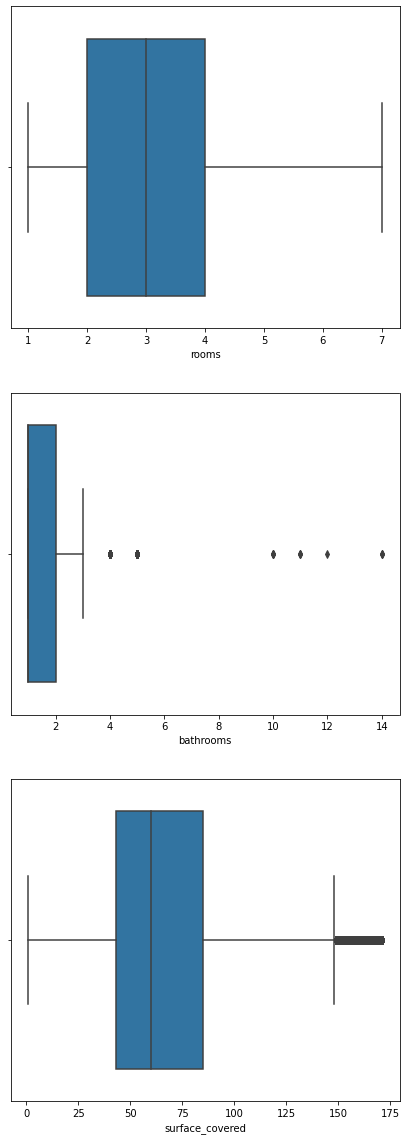

In [42]:
#rooms,bathrooms, surface_covered, antes de sacar los outliers
f, axes = plt.subplots(3, 1, figsize=(8, 8))
plt.subplots_adjust(bottom=0.1, right=0.8, top=2.0)

sns.boxplot(muestra["rooms"] , ax=axes[0])
sns.boxplot(muestra["bathrooms"] ,  ax=axes[1])
sns.boxplot(muestra["surface_covered"] , ax=axes[2])

plt.show()

Podemos observar en los Boxplot que los valores de outliers siguen disminuyendo y que no nos ha quedado ningun outlier restante en "Rooms".

In [43]:
muestra.describe()

,lat,lon,rooms,bathrooms,surface_covered,price
count,71394.000000,71394.000000,75116.000000,74347.000000,75116.000000,7.511600e+04
mean,-34.598490,-58.435751,2.809801,1.432539,68.575963,2.118102e+05
std,0.023263,0.035262,1.041505,0.689164,32.975126,1.474903e+05
min,-34.696419,-58.530468,1.000000,1.000000,1.000000,7.500000e+03
25%,-34.612171,-58.458152,2.000000,1.000000,43.000000,1.200000e+05
50%,-34.599003,-58.433516,3.000000,1.000000,60.000000,1.700000e+05
75%,-34.584785,-58.411767,4.000000,2.000000,85.000000,2.520000e+05
max,-34.535909,-58.353930,7.000000,14.000000,171.000000,3.249900e+06


Podemos observar en nuestros estadisticos que el desvio estandar continúa disminuyendo.
Por ultimo, vamos a analizar los outliers en nuestro feature "bathroom" :

In [44]:
# Cuantil 25 de Bathrooms
Q1 = muestra["bathrooms"].quantile(0.25)
print('El primer cuantil es:', Q1)
# Cuantil 75 de Superficie total
Q3 = muestra["bathrooms"].quantile(0.75)
print('El Tercer Cuartil es:', Q3)
# Cálculo del IQR
IQR = Q3 - Q1
# Mínimo valor de cantidad para Rooms
bathrooms_minimo = Q1 - (IQR*1.5)
# Máximo valor de cantidad para Rooms
bathrooms_maximo = Q3 + (IQR*1.5)

print("El valor de bathrooms maximo en es {}, y el minimo es {} y el IQR {}" .format(bathrooms_maximo,bathrooms_minimo,IQR))


El primer cuantil es: 1.0
El Tercer Cuartil es: 2.0
El valor de bathrooms maximo en es 3.5, y el minimo es -0.5 y el IQR 1.0


In [45]:
outliers_bathrooms = muestra[(muestra['bathrooms'] < bathrooms_minimo)| (muestra['bathrooms'] > bathrooms_maximo)]
outliers_bathrooms

,lat,lon,l3,rooms,bathrooms,surface_covered,price,property_type
231,-34.611004,-58.361275,Puerto Madero,3.0,4.0,149.0,1690000.0,Departamento
271,-34.598336,-58.421781,Almagro,4.0,4.0,100.0,580000.0,Departamento
277,-34.583683,-58.414859,Palermo,4.0,4.0,140.0,500000.0,Departamento
283,NaN,NaN,Palermo,4.0,4.0,100.0,580000.0,Departamento
317,-34.602770,-58.432289,Parque Centenario,4.0,4.0,155.0,370000.0,Departamento
...,...,...,...,...,...,...,...,...
112674,-34.609526,-58.444266,Caballito,4.0,4.0,131.0,275000.0,Casa
121800,-34.679951,-58.473000,Villa Lugano,7.0,4.0,150.0,310000.0,Casa
129812,-34.581111,-58.502124,Villa Pueyrredón,4.0,4.0,170.0,420000.0,Casa
131571,-34.635675,-58.387544,Barracas,4.0,4.0,143.0,260000.0,Casa


In [46]:
#eliminamos los outliers que estan fuera ambos bigotes (superior e inferior)

muestra = muestra[(muestra['bathrooms'] >= bathrooms_minimo)]
muestra = muestra[(muestra['bathrooms'] <= bathrooms_maximo)]

In [47]:
muestra.describe()

,lat,lon,rooms,bathrooms,surface_covered,price
count,69748.000000,69748.000000,73353.000000,73353.000000,73353.000000,7.335300e+04
mean,-34.598456,-58.435747,2.793410,1.395471,67.727469,2.075425e+05
std,0.023175,0.035207,1.031734,0.607385,32.134708,1.389782e+05
min,-34.696419,-58.530468,1.000000,1.000000,1.000000,7.500000e+03
25%,-34.612071,-58.458158,2.000000,1.000000,43.000000,1.200000e+05
50%,-34.598972,-58.433547,3.000000,1.000000,60.000000,1.690000e+05
75%,-34.584821,-58.411804,3.000000,2.000000,84.000000,2.500000e+05
max,-34.535909,-58.353930,7.000000,3.000000,171.000000,3.249900e+06


Ya que las variables "lat" y "lon" tienen desvios estandares muy bajos, vamos a concluir nuestra eliminacion de outliers aca.

In [48]:
muestra.isna().sum()

lat                3605
lon                3605
l3                    0
rooms                 0
bathrooms             0
surface_covered       0
price                 0
property_type         0
dtype: int64

Vamos a analizar sos valores nulos de "lat" y "lon" para ver si imputamos sus valores o si los droppeamos:

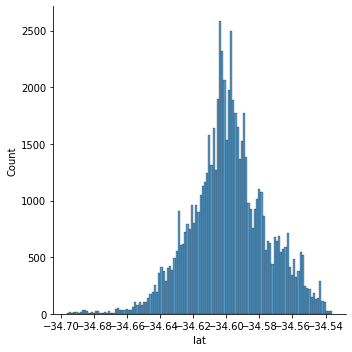

In [49]:
sns.displot(muestra.lat)

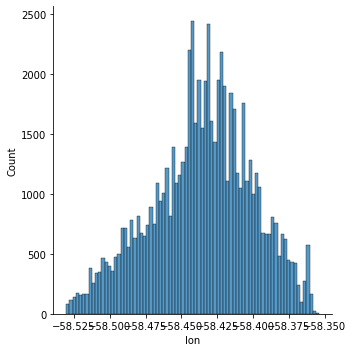

In [50]:
sns.displot(muestra.lon)

vemos una distribucion normal con leve asimetria a la izquierda pero con una alta kurtosis tanto en LAT como en LON, por ende, nos parece adecuado imputar estos valores con sus valores medios:

In [51]:
median_lat = float(muestra['lat'].median())
muestra.lat.fillna(median_lat, inplace=True)

In [52]:
median_lon = float(muestra['lon'].median())
muestra.lon.fillna(median_lon, inplace=True)

In [53]:
#chequeamos nuevamente que todos nuestros valores no sean Nulos o NaN.
muestra.isna().sum()
# muestra.shape

lat                0
lon                0
l3                 0
rooms              0
bathrooms          0
surface_covered    0
price              0
property_type      0
dtype: int64

In [54]:
muestra = muestra.drop(['l3'],axis=1)

In [55]:
muestra.head()

,lat,lon,rooms,bathrooms,surface_covered,price,property_type
0,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,Departamento
11,-34.603683,-58.381557,2.0,1.0,59.0,149000.0,Departamento
12,-34.630349,-58.417223,2.0,1.0,44.0,115000.0,Departamento
20,-34.608246,-58.444262,2.0,1.0,31.0,75000.0,Departamento
21,-34.603890,-58.410998,1.0,1.0,22.0,48000.0,Departamento


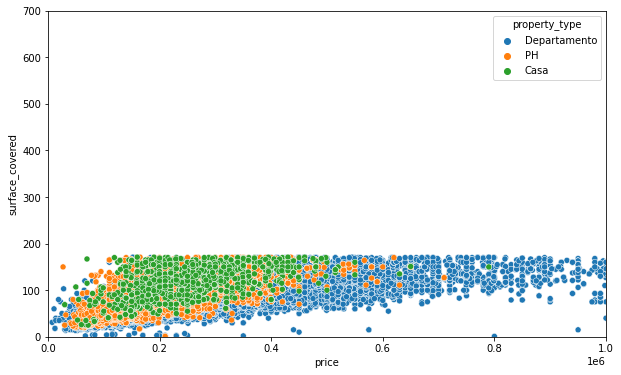

In [56]:
# grafico haciendo zoom en el grueso de los datos (surface_covered <= 1000 mts cuadrados y price <= 1.000.000$))
fig,ax = plt.subplots(figsize = (10,6))
sns.scatterplot(x = muestra.price, y = muestra.surface_covered, data = muestra, hue = "property_type", ax= ax)
plt.ylim(0, 700)
plt.xlim(0, 1000000)
plt.show()

Vamos a añadir dummies para "property type":

In [57]:
#Creamos dummies para la variable "property_type"
muestra['property_type'] = muestra['property_type'].astype('category')
muestra = pd.get_dummies(muestra, columns = ['property_type'])

In [58]:
muestra.rename({'property_type_Casa': 'casa', 'property_type_Departamento': 'departamento', 'property_type_PH': 'ph'}, axis=1, inplace=True)

In [59]:
#muestra_mod = muestra
muestra.reset_index(drop = True, inplace = True)


muestra.head()

,lat,lon,rooms,bathrooms,surface_covered,price,casa,departamento,ph
0,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,0,1,0
1,-34.603683,-58.381557,2.0,1.0,59.0,149000.0,0,1,0
2,-34.630349,-58.417223,2.0,1.0,44.0,115000.0,0,1,0
3,-34.608246,-58.444262,2.0,1.0,31.0,75000.0,0,1,0
4,-34.603890,-58.410998,1.0,1.0,22.0,48000.0,0,1,0


In [60]:
#sns.pairplot(muestra ,hue = "property_type")

Atravez del pairplot, se puede concluir que las variables "superficie total" y "superficie cubierta" tienen una alta correlacion on la variable "precio"

Por otro lado, se puede concluir que el resto de las variables no presentan correlacion significativa con el "precio"

Con este grafico de dispersion, podemos observar claramente la correlacion que existe entre el "precio" de un inmueble y su "superficie cubierta"
Tambien puede observarse que dicha correlacion varia segun el "tipo de propiedad", y lo mismo sucede con el grafico entre surface_covered y el price. Debajo podemos observarlo con mayor claridad en un grafico con zoom en el grueso de los datos.

Ya hemos removido los outliers que presentaron mas de 1 caso en todo nuestro dataset (es decir , que se encuentran repetidos al menos 1 vez).

Hay algunos valores que no se repiten, entonces estos no fueron eliminados por nuestra funcion "detectar_outliers".



In [61]:
muestra.head()

,lat,lon,rooms,bathrooms,surface_covered,price,casa,departamento,ph
0,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,0,1,0
1,-34.603683,-58.381557,2.0,1.0,59.0,149000.0,0,1,0
2,-34.630349,-58.417223,2.0,1.0,44.0,115000.0,0,1,0
3,-34.608246,-58.444262,2.0,1.0,31.0,75000.0,0,1,0
4,-34.603890,-58.410998,1.0,1.0,22.0,48000.0,0,1,0


## Modelo De Benchmark Del Proyecto 1

In [62]:
muestra_mod = ds[((ds["property_type"] == "Departamento") | (ds["property_type"] == "Casa") | (ds["property_type"] == "PH")) & (ds["l2"] == "Capital Federal")]
muestra_mod = muestra_mod[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]
muestra_mod = muestra_mod.dropna()
muestra_mod.reset_index(inplace = True, drop = True)
muestra_mod= muestra_mod[(muestra_mod["price"] <= 4000000) & (muestra_mod["surface_total"] <= 1000) & (muestra_mod["surface_total"] >= 15)]
muestra_mod.head()


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
4,2.0,1.0,1.0,56.0,56.0,150000.0


In [63]:
# Defino una funcion para aplicar el modelo a mis sets de entrenamiento y testeo y graficar la performance segun RMSE

def Aplicar_modelo(X_train, X_test, y_train, y_test, modelo):
    
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (15,6))
    plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r")

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
    plt.xlabel("Errores", fontweight = "black", fontsize = 12)
    plt.xticks(rotation = 45, horizontalalignment="right")
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(y_test, y_test_pred, s=1) 
    plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
    plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)
    plt.xticks(rotation = 45, horizontalalignment="right")

In [64]:
from sklearn.model_selection import train_test_split
# Genero los sets X e y para entrenar a ambos modelos:
# Comienzo probando con el modelo mas complejo, y tomo 7 variables para X y price para y
X_bm = muestra_mod[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]]
y_bm = muestra_mod.price

# genero los sets de entrenamiento y testeo

X_train, X_test, y_train, y_test = train_test_split(X_bm, y_bm, test_size=0.30, random_state=42)

In [65]:
# Utilizo la variable Error Cuadratico Medio para poder determinar la performance de mi modelo, ya que es un modelo de regresion y no un clasificador
# Para eso, importo desde metrics el metodo mean_squared_error
from sklearn.metrics import mean_squared_error

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

tree_3 = DecisionTreeRegressor(max_depth = 10, random_state = 42)

Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

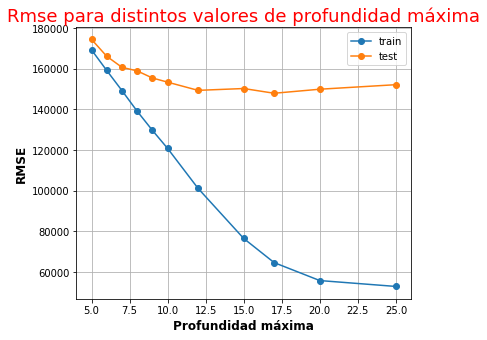

In [67]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [5,6,7,8,9,10,12,15,17,20,25]

for i in max_depths:
    tree_3 = DecisionTreeRegressor(max_depth = i)
    tree_3.fit(X_train, y_train)
    y_train_pred = tree_3.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = tree_3.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))    
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

Raíz del error cuadrático medio en Train: 120797.5008434747
Raíz del error cuadrático medio en Test: 152950.67757423845


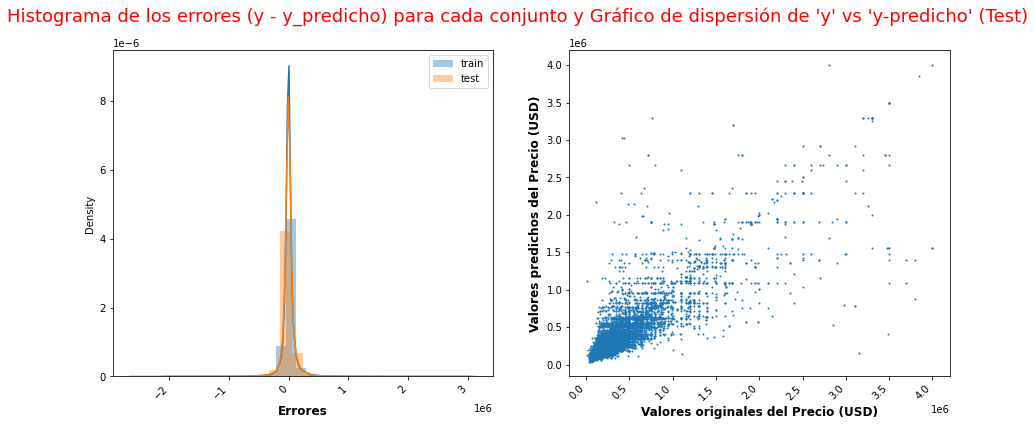

In [68]:
tree_3 = DecisionTreeRegressor(max_depth = 10, random_state = 42)
Aplicar_modelo(X_train, X_test, y_train, y_test, tree_3)

In [69]:
rmse_train_benchmark = int(120798)
rmse_test_benchmark = int(152951)

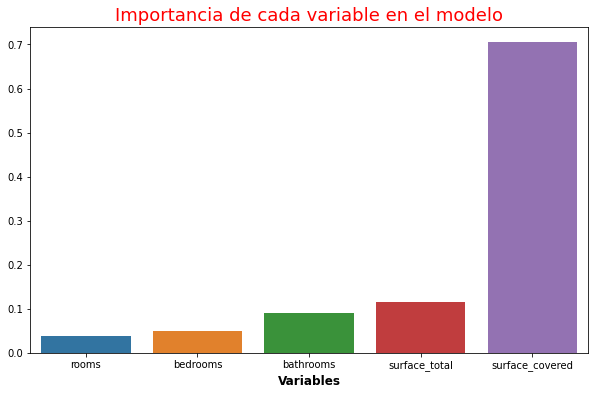

In [70]:
importances = tree_3.feature_importances_
columns = X_bm.columns

plt.figure(figsize = (10, 6))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.show()

## Regression Tree Con Los Nuevos Datos Transformados

In [71]:
from sklearn.model_selection import train_test_split
#preparamos los datos: variables predictoras y a predecir para los modelos:

y = muestra['price'].values
X = muestra.drop(['price'], axis= 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [72]:
from sklearn.preprocessing import MinMaxScaler
#escalado de datos en formato de Normalizacion

# scaler = MinMaxScaler()

# cols = ['rooms','bathrooms','surface_total', 'surface_covered','lat', 'lon']

# X_train[cols] = scaler.fit_transform(X_train[cols])
# X_test[cols] = scaler.fit_transform(X_test[cols])

Si hacemos la normalizacion, los resultados empeoran.
Esto se debe a que la normalizacion suele tener un impacto positivo unicamente en aquellos algoritmos que trabajan por distancias tales como KNN o SVM. En cuanto a los arboles de decision, solamente complica las sub-divisiones que el algoritmo va a hacer de las variables. 

Sin la normalizacion y solo con el resto de las transformaciones (scando outliers y agregando dummies para las property_type's) el modelo mejora significativamente reduciendo el RMSE comparado con el modelo de Benchmark.

In [73]:
print(X_train.shape)
print(y_train.shape)

(51347, 8)
(51347,)


Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

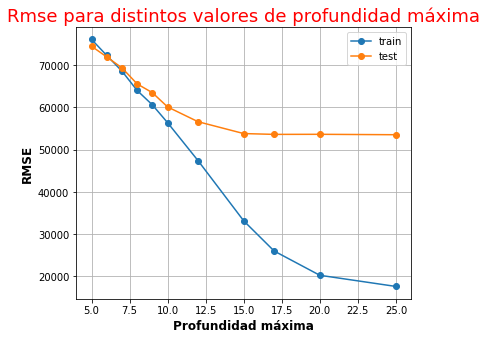

In [74]:
tree_new = DecisionTreeRegressor()

lista_rmse_train = []
lista_rmse_test = []
max_depths = [5,6,7,8,9,10,12,15,17,20,25]

for i in max_depths:
    tree_new = DecisionTreeRegressor(max_depth = i)
    tree_new.fit(X_train, y_train)
    y_train_pred = tree_new.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = tree_new.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))    
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

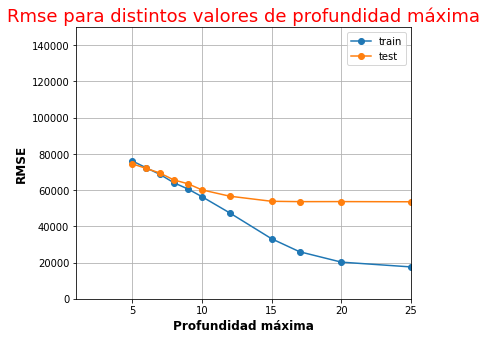

In [75]:
#hacemos zoom en la parte definitoria del grafico

plt.figure(figsize = (6,5))    
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.xlim(1,25)
plt.ylim(0,150000)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

param_grid = {'max_depth':np.arange(10, 18,1),
              'min_samples_split':[2,4,6,8,10], 
              'max_features': ['auto','sqrt', 'log2']}


Vamos a utilizar el mismo regressor_Tree utilizado en el modelo de benchmark pero entrenarlo con nuestros nuevos datos transformados de este sprint 2 y vamos a comparar su metrica de RMSE para el set de testeo.

Procedemos a realizar un grid search y elegir una gama de hiperparametros para poder optimizar los resultados del modelo con los mejores valores para los hiperparametros.


In [77]:
model = GridSearchCV(tree_new, param_grid=param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5

model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=25),
             param_grid={'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='neg_root_mean_squared_error')

In [78]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

resultados = pd.DataFrame(model.cv_results_)

resultados


new_tree_rmse = int(model.best_score_)

Mejores parametros: {'max_depth': 16, 'max_features': 'auto', 'min_samples_split': 8}
Mejor Score: -58891.81510991964



## Modelos Comparados (Benchmark y Nuevo Tree Con Transformacion De Datos)

In [79]:
model_performances=pd.DataFrame({'Modelo':['Benchmark RegressionTree','New RegressionTree'],
                                 'Test_RMSE':[rmse_test_benchmark ,abs(round(model.best_score_))]})

model_performances.sort_values(by = "Test_RMSE",ascending=True)

,Modelo,Test_RMSE
1,New RegressionTree,58892
0,Benchmark RegressionTree,152951


CONCLUSIONES DEL ANALISIS:

Tomo como modelo mas adecuado el modelo tree_3: arbol de decision de produndidad 10 con las variables "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "lat", "lon", ya que presenta el RMSE mas bajo, y es el modelo de benchmark para este segundo sprint.


Cuando comparamos el benchmark con el modelo con la nueva transformacion de datos, podemos observar que el test_RMSE es mas del doblemente bajo que en el benchmark. Es decir, nuestro nuevo modelo transformado arroja mas del 100% de mejores resultados de test_RMSE y esto se debe principalmente a nuestro manejo de outliers y pre procesamiento correcto de datos, especificamente de nuestras variables surface_covered y surface_total.

La eliminación de las instancias de surface_covered que fueran superiores a surface_total, la eliminacion de la variable surface_Total y la deteccion y eliminacion de los outliers de surface_Covered (logramos disminuir mas de un 100% el desvio estandard de la distribucion de esta variable) fueron factores principales para mejorar los resultados predictivos de nuestro regressor_Tree.

## Random Forest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf = RandomForestRegressor(n_estimators=100, oob_score = True, random_state = 42)

In [81]:
rf.fit(X_train,y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [82]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [83]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_rmse

23368.530614711024

In [84]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_rmse

43931.020334972476

In [85]:
#PRIMER BUSQUEDA /GRID SEARCH DE HIPERPARAMETROS.

# param_grid_1 = {
#     'max_depth':[6,8,10],
#     'max_features':['auto','sqrt','log2'],
#     'n_estimators': [100,150],
#     'min_samples_split':[2,4]}

# random_forest_optimal_params = GridSearchCV(estimator= rf , 
#                              param_grid=param_grid_1,
#                              scoring='neg_root_mean_squared_error',
#                              verbose=0,
#                              cv=3)

# Mejores hiperparametros de la primer busqueda:
#{'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}


#SEGUNDA BUSQUEDA DE OPTIMIZACION

param_grid_2 = {
    'max_depth':[25,30],
    'max_features':['auto'],
    'n_estimators': [100],
    'min_samples_split':[2]}

random_forest_optimal_params = GridSearchCV(estimator= rf , 
                             param_grid=param_grid_2,
                             scoring='neg_root_mean_squared_error',
                             verbose=0,
                             cv=3)

Procedemos a hacer una segunda busqueda de optimizacion de hiperparametros ya que en la primer busqueda, los valores de "max_depth" parecian que podian ser superiores al limite superior del arreglo de valores a probar.
De la misma forma, resolvimos que 100 era el number of estimators optimo y que min samples split debia ser 2 ya que fueron los valores predichospor el modelo de nuestro param grid.

In [86]:
random_forest_optimal_params.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(oob_score=True, random_state=42),
             param_grid={'max_depth': [25, 30], 'max_features': ['auto'],
                         'min_samples_split': [2], 'n_estimators': [100]},
             scoring='neg_root_mean_squared_error')

In [87]:
print("Mejores parametros: "+str(random_forest_optimal_params.best_params_))
print("Mejor Score: "+str(random_forest_optimal_params.best_score_)+'\n')
resultados_rf = pd.DataFrame(random_forest_optimal_params.cv_results_)

resultados_rf

Mejores parametros: {'max_depth': 25, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
Mejor Score: -50889.91467741971



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,14.259605,0.059143,0.580039,0.009888,25,auto,2,100,"{'max_depth': 25, 'max_features': 'auto', 'min...",-47501.886530,-52573.597749,-52594.259753,-50889.914677,2395.712528,1
1,13.871204,0.363483,0.582045,0.012382,30,auto,2,100,"{'max_depth': 30, 'max_features': 'auto', 'min...",-47567.961369,-52640.445739,-52594.977633,-50934.461581,2380.547499,2


In [88]:
random_forest_rmse = abs(int(random_forest_optimal_params.best_score_))
random_forest_rmse

50889

Aplicamos nuestra funcion "aplicar modelo" para poder observar la distribucion de los errores de nuestro modelo de Random Forest:

## Distribucion de Errores de Regresion:

Raíz del error cuadrático medio en Train: 23368.530614711024
Raíz del error cuadrático medio en Test: 43931.020334972476


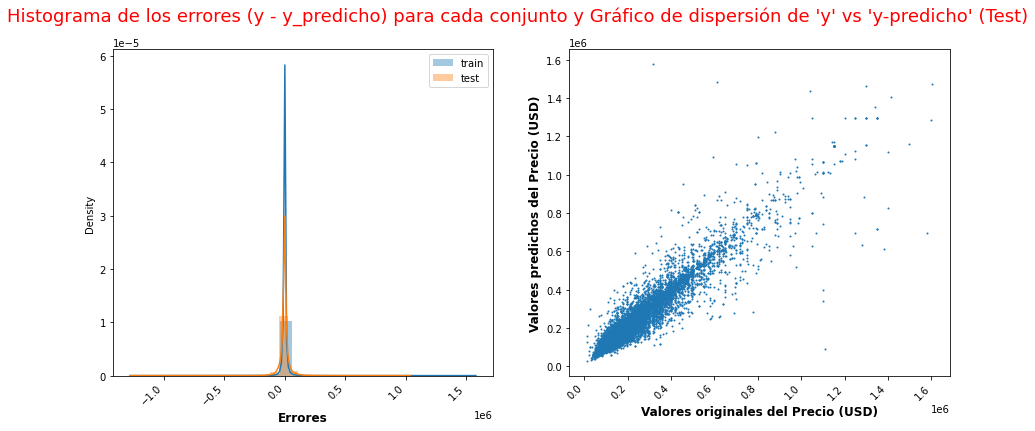

In [89]:
Aplicar_modelo(X_train, X_test, y_train, y_test, rf)

Podemos observar que la distribucion de los errores en train y test es muy similar. Esto nos muestra que no estamos incurriendo en overfitting, ya que los errores de regresion en ambos conjuntos son similares. 

Si analizamos mas en profundidad la distribucion de estos errores, observamos que tanto en train como en test, la distribucion de los errores de regresion presenta una forma de campana gaussiana con una kurtosis muy elevada alrededor del cero y con un desvio estandard bajo ya que sus colas no llegan ni a +/- 0.25 y no presentan ningun tipo de asimetrías.

Podemos observar tambien que los errores en train presentan una kurtosis mas leptocurtica que en test, y eso se refleja en las diferencias en el error que nos arroja nuestro modelo: Train 23 mil VS. Test 43 mil.

De todas formas, podemos decir con certeza que nuestros valores no presentan overfitting al haber hecho random forest y con la validacion cruzada en la optimizacion de hiperparametros.

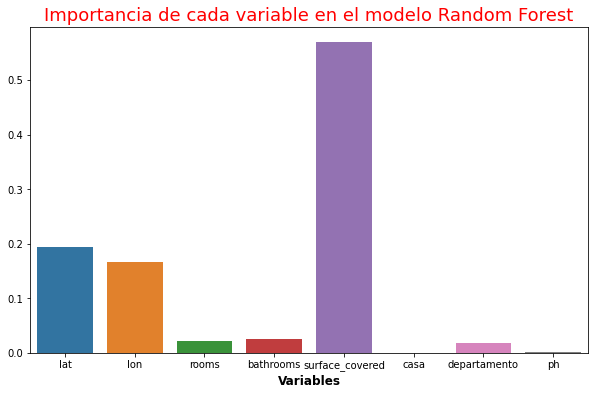

In [90]:
importances = rf.feature_importances_
columns = X.columns

plt.figure(figsize = (10, 6))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo Random Forest", fontsize = 18, color = "r")
plt.show()

## Modelos Comparados Finales:

In [91]:
model_performances_2=pd.DataFrame({'Modelo':['Benchmark RegressionTree','New RegressionTree','RandomForestRegressorTree'],
                                 'Test_RMSE':[(rmse_test_benchmark) ,abs(new_tree_rmse), random_forest_rmse]})

model_performances_2.sort_values(by = "Test_RMSE",ascending=True)

,Modelo,Test_RMSE
2,RandomForestRegressorTree,50889
1,New RegressionTree,58891
0,Benchmark RegressionTree,152951


## Conclusiones

Podemos observar que los modelos dieron los resultados segun lo teoricamente esperado a priori. Es decir, Random Forest Regressor arrojaro las mejores predicciones versus los modelos de decision tree que arroja errores mas altos.

El Root mean squared error del set de testeo fue el mas bajo en Random Forest ya que es el modelo mas robusto. El algoritmo de Random Forest calcula los residuos entre el valor observado y el valor predicho y estos residuos son las predicciones de cada arbol. Tambien, tenemos muchisimos hiperparametros que ayudan a optimizar estos resultados y hacerlos mas robustos tales como el lambda (factor de regularizacion que ayuda a evitar el sobreajuste del modelo) el gama (factor utilizado para ver si tenemos que depurar o no una rama del arbol), etc.


Por otro lado, el Test_RMSE fue mas alto en nuestro Decision Tree Benchmark y en nuestro Decision Tree con los datos transformados.
Por las razones teoricas que ya creiamos de antemano, un arbol de decision nos puede dar una buena primera aproximacion acerca de si estamos en un camino correcto o no a la hora de predecir, pero la realidad es que suelen ser modelos muy simples comparados contra Random Forest. El poder de predictividad que puede tener 1 solo arbol de decision en la mayoria de los casos puede arrojar metricas de error mucho mayores que las de un random forest (que no solo utiiza muchos arboles de decision con distinto depth, sino que tambien ofrece la opcion de bootstrapping aggregation para trabajar con distintas muestras en cada arbol, teniendo la posibilidad de cambiar la cantidad de features y el porcentaje de muestreo que se utilizan para cada agregacion ayudando al insesgamiento y la consistencia de la prediccion) Estos modelos tienen una gran robustez y es por eso que suelen ser preferidos a la hora de mejorar predicciones y metricas. 

Estudiando las variables del modelo podemos llegar a la conclusion de que las principales variables predictivas del dataset son la mayoria de las que de antemano creiamos:

Quiza pensabamos que algunas variables iban a tener mayor o menor influencia en algunos modelos en particular, pero se verifica la idea de que surface_covered es la principal variable predictiva de los precios en todos los modelos (lo cual tiene mucho sentido desde un punto de vista de negocio) al igual que surface_total (que la tuvimos que eliminar del dataset por su alta correlacion con surface_covered).

Luego, la importancia de las variables a la hora de predecir fue variable segun el modelo:


De antemano hubiesemos creido que las variables rooms y bathrooms son variables predictoras principales. En el negocio inmobiliario, tener casas con cuartos en suite, muchos banos y cuartos suele ser sinonimo de una casa-departamento mas caro. En este dataset, hemos visto que a pesar de ser importantes y significativas para las predicciones, no tienen un peso principal como surface_covered y nos hemos visto sorprendidos por la mayor importancia relativa que tienen las variables lat y lon en la prediccion de los precios (es decir, claramente creiamos que la ubicacion geografica de los hogares va a tener un impacto en los precios, sobre todo en una ciudad con alta brecha socioeconomica como Buenos Aires, pero no creiamos que iba a tener mas importancia que rooms o bathrooms).



## Metodologia Implementada

Nos parece acertada nuestra metodologia implementada ya que las metricas de error fueron bastante bajas, sobre todo en los de Random Forest y tambien la forma de abordar el pre procesamiento (solamente con una correcta imputacion de valores, eliminacion de outliers y valores absurdos logramos transformar los datos del sprint 1 y que nuestras metricas sean mas de un 100% mejores).


De todas formas, siempre se pueden encontrar maneras de mejorar las metricas y la metodologia. Se me ocurre que si hubiesemos probado PCA para reduccion de dimensionalidad en los barrios, nuestras metricas hubiesen mejorado aun mas. 

Tambien, combinando columnas en la etapa de feature engineering podriamos haber creado nuevas features que, luego de un proceso de iteracion de prueba y error, hubiese logrado mejorar nuestros resultados tambien. 
Se me ocurre que tal vez podriamos haber desagregado el precio en una nueva columna como el precio por metro cuadrado construido. Asi, haciendo una razon combinando la surface_covered (superficie construida, cubierta) con el precio total de un inmueble.